<a href="https://colab.research.google.com/github/mayaraperroni9/datascience/blob/main/predict_profile_HIV_AIDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Conjunto de dados disponível para baixar em: https://www.kaggle.com/datasets/neharautela/hivaids


#Hipóteses

* Analisar a relação entre a quantidade de pessoas afetadas e o país (traçar o perfil dos países mais/menos afetados)
* Predizer que faixa etária tem tendência a ser afetado pelo vírus da AIDS/HIV
* Apontar o perfil médio (em relação ao gênero, faixa etária, nacionalidade e etc) que historicamente mais sofreu de AIDS/HIV
* Analisar a relação entre a cobertura de aplicação da terapia ART e o número de mortes por AIDS
* Verificar se existe relação entre o tratamento ART em gestantes e a diminuição de mortes infantis por AIDS, especificamente





In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

##As principais causas de mortes no mundo


In [ ]:
deaths_world_data = pd.read_csv("/content/sample_data/HIV_AIDS/causes_of_death_world.csv")
test_deaths_world_data = pd.read_csv("/content/sample_data/HIV_AIDS/causes_of_death_world.csv")
train_deaths_world_data = pd.read_csv("/content/sample_data/HIV_AIDS/causes_of_death_world.csv")

print(deaths_world_data.head())
print(test_deaths_world_data)
print(train_deaths_world_data )


       Country countyr Code    Year  \
0  Afghanistan          AFG  2007.0   
1  Afghanistan          AFG  2008.0   
2  Afghanistan          AFG  2009.0   
3  Afghanistan          AFG  2011.0   
4  Afghanistan          AFG  2012.0   

   Deaths - Meningitis - Sex: Both - Age: All Ages (Number)  \
0                                             2933.0          
1                                             2731.0          
2                                             2460.0          
3                                             2327.0          
4                                             2254.0          

   Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number)  \
0                                             1402.0                                       
1                                             1424.0                                       
2                                             1449.0                                       
3                 

##Cobertura de Terapia Anti Retroviral para gestantes



In [ ]:
ART_pregnant_data = pd.read_csv("/content/sample_data/HIV_AIDS/art-coverage-for-pregnant-women.csv")
test_ART_pregnant_data = pd.read_csv("/content/sample_data/HIV_AIDS/art-coverage-for-pregnant-women.csv")
train_ART_pregnant_data = pd.read_csv("/content/sample_data/HIV_AIDS/art-coverage-for-pregnant-women.csv")

print(ART_pregnant_data)
print(test_ART_pregnant_data)
print(train_ART_pregnant_data)

          Country Country Code  Year  \
0     Afghanistan          AFG  2000   
1     Afghanistan          AFG  2001   
2     Afghanistan          AFG  2002   
3     Afghanistan          AFG  2003   
4     Afghanistan          AFG  2004   
...           ...          ...   ...   
2071     Zimbabwe          ZWE  2016   
2072     Zimbabwe          ZWE  2017   
2073     Zimbabwe          ZWE  2018   
2074     Zimbabwe          ZWE  2019   
2075     Zimbabwe          ZWE  2020   

      Antiretroviral therapy coverage for(% of pregnant women surviving with HIV)  
0                                                     0                            
1                                                     0                            
2                                                     0                            
3                                                     0                            
4                                                     0                            
...            

##Relação entre a cobertura de aplicação da terapia ART e o número de mortes por AIDS

In [ ]:
ART_death_data = pd.read_csv("/content/sample_data/HIV_AIDS/Tb_deaths_and_art_coverage_.csv")
test_ART_death_data = pd.read_csv("/content/sample_data/HIV_AIDS/Tb_deaths_and_art_coverage_.csv")
train_ART_death_data = pd.read_csv("/content/sample_data/HIV_AIDS/Tb_deaths_and_art_coverage_.csv")

print(ART_death_data)
print(test_ART_death_data)
print(train_ART_death_data)

               Country  \
0          Afghanistan   
1              Albania   
2       American Samoa   
3              Andorra   
4               Angola   
..                 ...   
189            Vietnam   
190  Wallis and Futuna   
191              Yemen   
192             Zambia   
193           Zimbabwe   

     Sum of TB patients living with HIV receiving ART - Total  \
0                                                   27          
1                                                   39          
2                                                    0          
3                                                    1          
4                                                 2727          
..                                                 ...          
189                                              18068          
190                                                  0          
191                                                 42          
192                                  

##Pacientes com HIV/AIDS em diferentes faixas etárias

In [ ]:
age_death_data = pd.read_csv("/content/sample_data/HIV_AIDS/Age_share_death.csv")
test_age_death_data = pd.read_csv("/content/sample_data/HIV_AIDS/Age_share_death.csv")
train_age_death_data = pd.read_csv("/content/sample_data/HIV_AIDS/Age_share_death.csv")

print(age_death_data.head())
#print(test_age_death_data)
#print(train_age_death_data)

valores_ausentes_total = age_death_data.isna().any().any()

print(valores_ausentes_total)

       Country Codecountry    Year  \
0  Afghanistan         AFG  1990.0   
1  Afghanistan         AFG  1991.0   
2  Afghanistan         AFG  1992.0   
3  Afghanistan         AFG  1993.0   
4  Afghanistan         AFG  1994.0   

   Deaths - HIV/AIDS - Sex: Both - Age: Under 5 (Number)  \
0                                                 10       
1                                                 12       
2                                                 13       
3                                                 16       
4                                                 19       

   Deaths - HIV/AIDS - Sex: Both - Age: 70+ years (Number)  \
0                                                  1         
1                                                  1         
2                                                  2         
3                                                  2         
4                                                  2         

   Deaths - HIV/AIDS - Sex: Both - Ag

• Funções sumifs() usadas para agregar a região de dados em termos de
região • Usei sumif() para segregar o no. de pacientes em diferentes faixas etárias
• Utilizou-se sumifs() para encontrar o número total de pacientes com TB entre os óbitos por HIV.
• Usado countif() para encontrar a porcentagem de pacientes do sexo masculino e feminino.

17633438
17633438


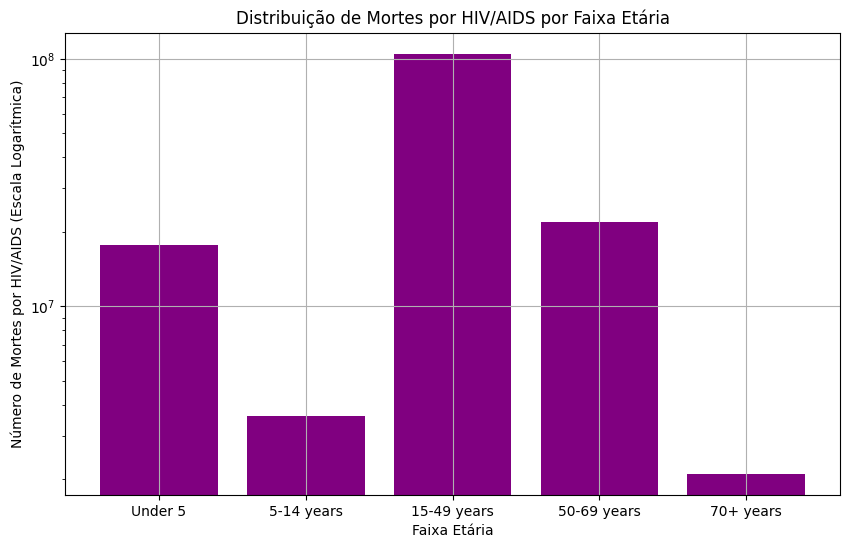

In [ ]:
# Calcular o total de mortes por faixa etária
total_deaths_under_5 = age_death_data['Deaths - HIV/AIDS - Sex: Both - Age: Under 5 (Number)'].sum()
total_deaths_5_14 = age_death_data['Deaths - HIV/AIDS - Sex: Both - Age: 5-14 years (Number)'].sum()
total_deaths_15_49 = age_death_data['Deaths - HIV/AIDS - Sex: Both - Age: 15-49 years (Number)'].sum()
total_deaths_50_69 = age_death_data['Deaths - HIV/AIDS - Sex: Both - Age: 50-69 years (Number)'].sum()
total_deaths_70_plus = age_death_data['Deaths - HIV/AIDS - Sex: Both - Age: 70+ years (Number)'].sum()

# Criar lista com os totais de mortes por faixa etária
total_deaths_by_age = [total_deaths_under_5, total_deaths_5_14, total_deaths_15_49, total_deaths_50_69, total_deaths_70_plus]
faixas_etarias = ['Under 5', '5-14 years', '15-49 years', '50-69 years', '70+ years']

print(total_deaths_under_5)
print(total_deaths_under_5)

# Plotar o histograma com escala logarítmica no eixo y
plt.figure(figsize=(10, 6))
plt.bar(faixas_etarias, total_deaths_by_age, color='purple')
plt.yscale('log')  # Definir escala logarítmica no eixo y
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Mortes por HIV/AIDS (Escala Logarítmica)')
plt.title('Distribuição de Mortes por HIV/AIDS por Faixa Etária')
plt.grid(True)


plt.show()





Gênero

In [ ]:
women_living_hiv_data = pd.read_csv("/content/sample_data/HIV_AIDS/women_population_hiv.csv")
#test_age_death_data = pd.read_csv("/content/sample_data/HIV_AIDS/women_population_hiv.csv")
#train_age_death_data = pd.read_csv("/content/sample_data/HIV_AIDS/women_population_hiv.csv")

print(women_living_hiv_data.head())

valores_ausentes_total = women_living_hiv_data.isna().any().any()

print(valores_ausentes_total)

       Country Code  Year  \
0  Afghanistan  AFG  1990   
1  Afghanistan  AFG  1991   
2  Afghanistan  AFG  1992   
3  Afghanistan  AFG  1993   
4  Afghanistan  AFG  1994   

   Women's share of population ages 15+ living with HIV (%)  
0                                               24.2         
1                                               24.4         
2                                               24.5         
3                                               25.0         
4                                               25.4         
True


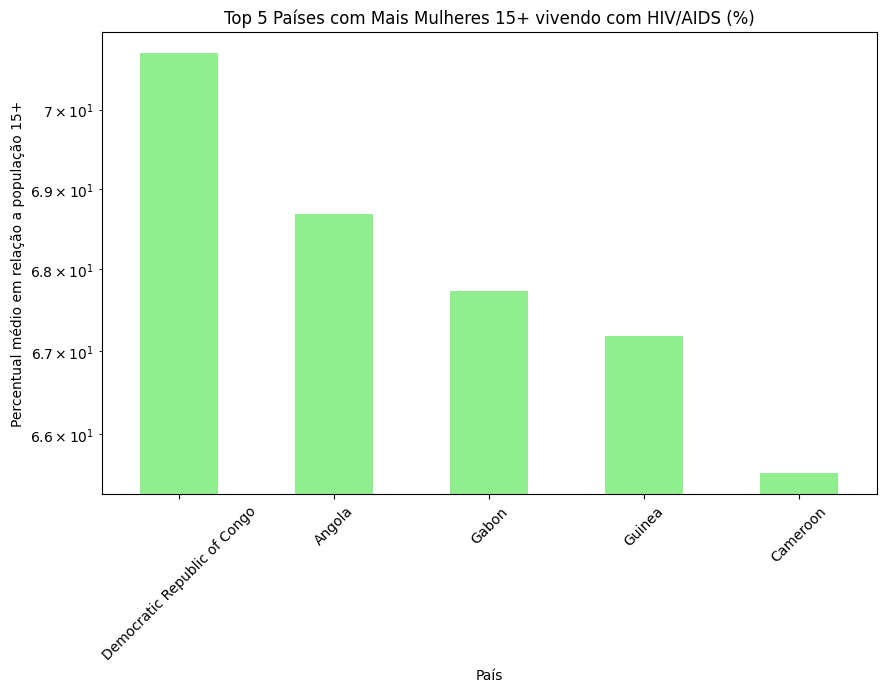

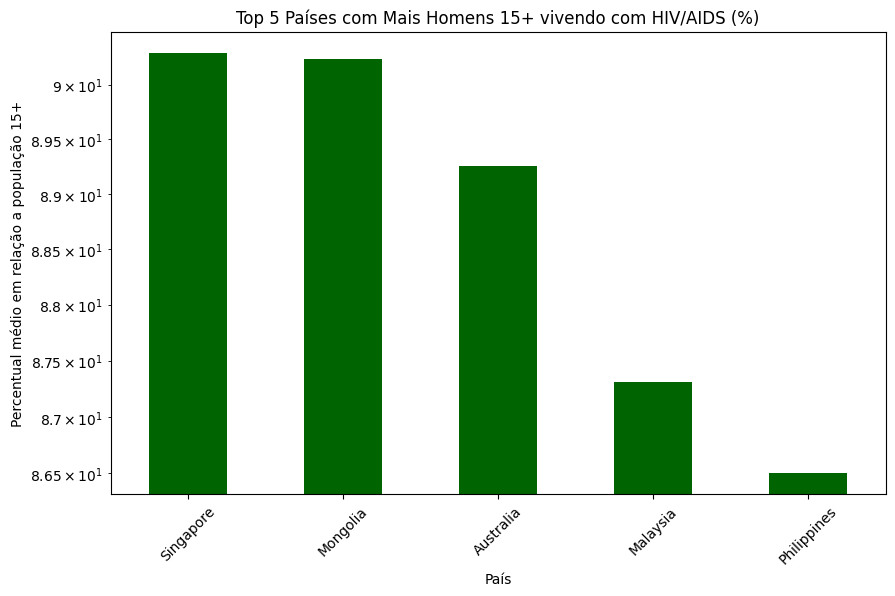

In [ ]:
percent_country = women_living_hiv_data.groupby('Country')["Women's share of population ages 15+ living with HIV (%)"]
estatisticas = percent_country.mean()
top_countries_women = estatisticas.nlargest(5)
top_countries_men = estatisticas.nsmallest(5)

#print(top_countries_men)

top_countries_men = 100 - top_countries_men

# Plotar o histograma mulheres
plt.figure(figsize=(10, 6))
top_countries_women.plot(kind='bar', color='lightgreen')
plt.xlabel('País')
plt.ylabel('Percentual médio em relação a população 15+')
plt.title('Top 5 Países com Mais Mulheres 15+ vivendo com HIV/AIDS (%)')
plt.xticks(rotation=45)
plt.yscale('log')
plt.grid(axis='y')
plt.show()

# Plotar o histograma homens.
plt.figure(figsize=(10, 6))
top_countries_men.plot(kind='bar', color='darkgreen')
plt.xlabel('País')
plt.ylabel('Percentual médio em relação a população 15+')
plt.title('Top 5 Países com Mais Homens 15+ vivendo com HIV/AIDS (%)') #posso afirmar que são homens 15+?
plt.xticks(rotation=45)
plt.yscale('log')
plt.grid(axis='y')
plt.show()

#print(top_countries_men)


       Country Codecountry    Year  \
0  Afghanistan         AFG  1990.0   
1  Afghanistan         AFG  1991.0   
2  Afghanistan         AFG  1992.0   
3  Afghanistan         AFG  1993.0   
4  Afghanistan         AFG  1994.0   

   Deaths - HIV/AIDS - Sex: Both - Age: Under 5 (Number)  \
0                                                 10       
1                                                 12       
2                                                 13       
3                                                 16       
4                                                 19       

   Deaths - HIV/AIDS - Sex: Both - Age: 70+ years (Number)  \
0                                                  1         
1                                                  1         
2                                                  2         
3                                                  2         
4                                                  2         

   Deaths - HIV/AIDS - Sex: Both - Ag

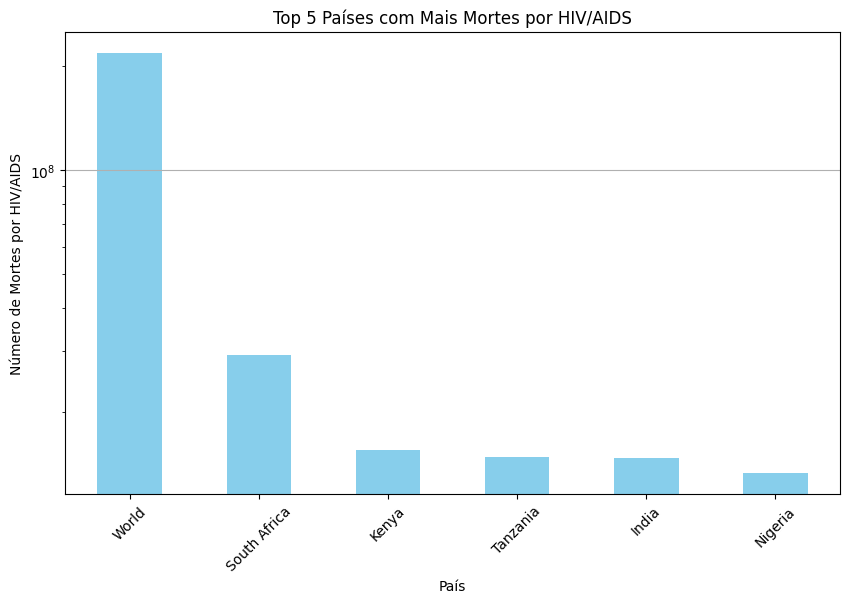

In [ ]:
# Remover as linhas onde a coluna "Country" contém a palavra "word"
age_death_data = age_death_data[~age_death_data['Country'].str.contains('word', na=False)]

age_death_data['Total Deaths'] = age_death_data.iloc[:, 3:].sum(axis=1)

# Remover a entrada com a palavra "word" da coluna "Country" após calcular o total de mortes
age_death_data = age_death_data[age_death_data['Country'] != 'word']

print(age_death_data.head())

# Agrupar os dados por país e calcular o total de mortes por país
total_deaths_by_country = age_death_data.groupby('Country')['Total Deaths'].sum()

# Selecionar os cinco países com mais mortes
top_countries = total_deaths_by_country.nlargest(6)

# Plotar o histograma
plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar', color='skyblue')
plt.xlabel('País')
plt.ylabel('Número de Mortes por HIV/AIDS')
plt.title('Top 5 Países com Mais Mortes por HIV/AIDS')
plt.xticks(rotation=45)
plt.yscale('log')
plt.grid(axis='y')
plt.show()


In [ ]:
from scipy.stats import kurtosis
top_countries_list = ['South Africa','Kenya','Tanzania','India','Nigeria','Brazil']
#mascara = (age_death_data['Country'].isin(top_countries_list))

# Aplicando a máscara para selecionar as linhas correspondentes
#porcao_selecionada = age_death_data[mascara]
colunas_especificas = ['Deaths - HIV/AIDS - Sex: Both - Age: Under 5 (Number)',
'Deaths - HIV/AIDS - Sex: Both - Age: 5-14 years (Number)',
'Deaths - HIV/AIDS - Sex: Both - Age: 15-49 years (Number)',
'Deaths - HIV/AIDS - Sex: Both - Age: 50-69 years (Number)',
'Deaths - HIV/AIDS - Sex: Both - Age: 70+ years (Number)']

for string in top_countries_list:
    print(f"Resultados para '{string}':")

    # Criando uma máscara booleana para selecionar linhas onde a coluna 'Country' contém a string específica
    mascara = age_death_data['Country'] == string

    # Filtrando o DataFrame com base na máscara
    age_death_data_filtrado = age_death_data[mascara]

    # Calculando a média, o desvio padrão e a curtose para cada coluna específica
    for coluna in colunas_especificas:
        media = age_death_data_filtrado[coluna].mean()
        desvio_padrao = age_death_data_filtrado[coluna].var()
        mediana = age_death_data_filtrado[coluna].median()

        print(f"  > Coluna '{coluna}':")
        print(f"    - Média de mortes por ano: {media:.2f}")
        print(f"    - Variância: {desvio_padrao:.2f}")
        print(f"    - Mediana : {mediana:.2f}")
    print()

Resultados para 'South Africa':
  > Coluna 'Deaths - HIV/AIDS - Sex: Both - Age: Under 5 (Number)':
    - Média de mortes por ano: 12059.80
    - Variância: 86817436.51
    - Mediana : 9163.50
  > Coluna 'Deaths - HIV/AIDS - Sex: Both - Age: 5-14 years (Number)':
    - Média de mortes por ano: 2642.50
    - Variância: 4457603.16
    - Mediana : 3155.00
  > Coluna 'Deaths - HIV/AIDS - Sex: Both - Age: 15-49 years (Number)':
    - Média de mortes por ano: 118270.43
    - Variância: 5284170813.08
    - Mediana : 123498.00
  > Coluna 'Deaths - HIV/AIDS - Sex: Both - Age: 50-69 years (Number)':
    - Média de mortes por ano: 26647.27
    - Variância: 277093364.55
    - Mediana : 32711.00
  > Coluna 'Deaths - HIV/AIDS - Sex: Both - Age: 70+ years (Number)':
    - Média de mortes por ano: 2856.40
    - Variância: 3069572.80
    - Mediana : 3231.50

Resultados para 'Kenya':
  > Coluna 'Deaths - HIV/AIDS - Sex: Both - Age: Under 5 (Number)':
    - Média de mortes por ano: 11641.83
    - Variânc

###Analisar a relação entre a quantidade de pessoas afetadas e o país:

In [ ]:
# Carregar os dados
age_death_data = pd.read_csv("/content/sample_data/HIV_AIDS/Age_share_death.csv")

# Verificar as colunas presentes nos dados
print(age_death_data.columns)

# Se 'Sex' é a coluna correta, então vamos tentar agrupar por ela
# Calcular médias para diferentes variáveis de interesse
gender_avg = age_death_data.groupby('Sex').mean()
age_group_avg = age_death_data.groupby('Deaths - HIV/AIDS - Sex: Both - Age: 70+ years (Number)').mean()
nationality_avg = age_death_data.groupby('Country').mean()

print("Perfil médio em relação ao gênero:")
print(gender_avg)
print("\nPerfil médio em relação à faixa etária:")
print(age_group_avg)
print("\nPerfil médio em relação à nacionalidade:")
print(nationality_avg)

Index(['Country', 'Codecountry', 'Year',
       'Deaths - HIV/AIDS - Sex: Both - Age: Under 5 (Number)',
       'Deaths - HIV/AIDS - Sex: Both - Age: 70+ years (Number)',
       'Deaths - HIV/AIDS - Sex: Both - Age: 5-14 years (Number)',
       'Deaths - HIV/AIDS - Sex: Both - Age: 15-49 years (Number)',
       'Deaths - HIV/AIDS - Sex: Both - Age: 50-69 years (Number)'],
      dtype='object')


KeyError: 'Sex'

###Predizer que faixa etária tem tendência a ser afetada pelo vírus da AIDS/HIV:

In [ ]:
# Carregar os dados do arquivo CSV que contém as informações sobre mortes relacionadas ao HIV/AIDS
age_death_data = pd.read_csv("/content/sample_data/HIV_AIDS/Age_share_death.csv")

# Selecionar apenas as colunas relevantes que contêm o número de mortes em diferentes faixas etárias
age_data = age_death_data[['Deaths - HIV/AIDS - Sex: Both - Age: Under 5 (Number)',
                           'Deaths - HIV/AIDS - Sex: Both - Age: 5-14 years (Number)',
                           'Deaths - HIV/AIDS - Sex: Both - Age: 15-49 years (Number)',
                           'Deaths - HIV/AIDS - Sex: Both - Age: 50-69 years (Number)',
                           'Deaths - HIV/AIDS - Sex: Both - Age: 70+ years (Number)']]

# Criar uma cópia do DataFrame para evitar a modificação do original
age_data_copy = age_data.copy()

# Calcular o total de mortes em todas as faixas etárias e armazenar em uma nova coluna 'Total Deaths'
age_data_copy['Total Deaths'] = age_data_copy.sum(axis=1)

# Preparar os dados para treinamento:
# X representa as variáveis independentes (faixas etárias)
X = age_data
# y representa a variável dependente (total de mortes)
y = age_data_copy['Total Deaths']

# Criar um modelo de regressão linear
model = LinearRegression()
# Treinar o modelo com os dados de entrada e saída
model.fit(X, y)

# Obter os coeficientes do modelo, que representam a contribuição de cada faixa etária para o total de mortes
coefficients = model.coef_
# Obter o intercepto do modelo, que representa o valor esperado de mortes quando todas as faixas etárias são zero
intercept = model.intercept_

# Imprimir os coeficientes e o intercepto do modelo
print("Coeficientes do modelo de regressão linear:")
print(coefficients)
print("\nIntercepto do modelo:")
print(intercept)

Coeficientes do modelo de regressão linear:
[1. 1. 1. 1. 1.]

Intercepto do modelo:
7.275957614183426e-12


###Apontar o perfil médio (em relação ao gênero, faixa etária, nacionalidade, etc.) historicamente mais afetado pela AIDS/HIV:

In [ ]:
# Carregar os dados
age_death_data = pd.read_csv("/content/sample_data/HIV_AIDS/Age_share_death.csv")

# Verificar as colunas presentes nos dados
print(age_death_data.columns)

# Se 'Gender' não for uma coluna válida, identifique o nome correto da coluna
# Vamos assumir que a coluna correta é 'Sex'
# Calcular médias para diferentes variáveis de interesse
gender_avg = age_death_data.groupby('Sex').mean()
age_group_avg = age_death_data.groupby('Age_Group').mean()
nationality_avg = age_death_data.groupby('Country').mean()

print("Perfil médio em relação ao gênero:")
print(gender_avg)
print("\nPerfil médio em relação à faixa etária:")
print(age_group_avg)
print("\nPerfil médio em relação à nacionalidade:")
print(nationality_avg)

Index(['Country', 'Codecountry', 'Year',
       'Deaths - HIV/AIDS - Sex: Both - Age: Under 5 (Number)',
       'Deaths - HIV/AIDS - Sex: Both - Age: 70+ years (Number)',
       'Deaths - HIV/AIDS - Sex: Both - Age: 5-14 years (Number)',
       'Deaths - HIV/AIDS - Sex: Both - Age: 15-49 years (Number)',
       'Deaths - HIV/AIDS - Sex: Both - Age: 50-69 years (Number)'],
      dtype='object')


KeyError: 'Sex'